In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
cb_df= pd.read_csv("Resources/JC-201910-citibike-tripdata.csv")
cb_df

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,892,2019-10-01 00:20:05.0140,2019-10-01 00:34:57.3800,3275,Columbus Drive,40.718355,-74.038914,3280,Astor Place,40.719282,-74.071262,29544,Subscriber,1976,1
1,374,2019-10-01 00:43:48.8790,2019-10-01 00:50:03.8190,3211,Newark Ave,40.721525,-74.046305,3791,Hoboken Ave at Monmouth St,40.735208,-74.046964,29536,Subscriber,1984,1
2,170,2019-10-01 01:35:51.8630,2019-10-01 01:38:42.5470,3194,McGinley Square,40.725340,-74.067622,3679,Bergen Ave,40.722104,-74.071455,26304,Subscriber,1986,1
3,946,2019-10-01 02:55:53.4000,2019-10-01 03:11:40.2710,3272,Jersey & 3rd,40.723332,-74.045953,3679,Bergen Ave,40.722104,-74.071455,29496,Customer,1969,0
4,517,2019-10-01 03:10:16.1290,2019-10-01 03:18:53.6350,3206,Hilltop,40.731169,-74.057574,3210,Pershing Field,40.742677,-74.051789,26205,Subscriber,1969,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42248,287,2019-10-31 23:42:25.1120,2019-10-31 23:47:12.6180,3209,Brunswick St,40.724176,-74.050656,3186,Grove St PATH,40.719586,-74.043117,26160,Subscriber,1987,1
42249,532,2019-10-31 23:48:07.5720,2019-10-31 23:56:59.7280,3187,Warren St,40.721124,-74.038051,3187,Warren St,40.721124,-74.038051,26292,Subscriber,1976,0
42250,202,2019-10-31 23:50:04.3480,2019-10-31 23:53:26.6230,3681,Grand St,40.715178,-74.037683,3185,City Hall,40.717732,-74.043845,26180,Subscriber,1977,1
42251,841,2019-10-31 23:53:24.5280,2019-11-01 00:07:25.8950,3199,Newport Pkwy,40.728745,-74.032108,3483,Montgomery St,40.719420,-74.050990,29655,Subscriber,1958,1


In [3]:
col_n= cb_df.columns
col_n

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')

In [4]:
cb_df['starttime'] = pd.to_datetime(cb_df['starttime'])
cb_df['stoptime'] = pd.to_datetime(cb_df['stoptime'])
cb_df['start_day_of_week'] = cb_df['starttime'].dt.day_name()
cb_df['user_type'] = cb_df['usertype'].apply(lambda x: 'Subscriber' if x == 'Subscriber' else 'Customer')
daily_user_type_proportions = cb_df.groupby(['start_day_of_week', 'user_type'])['tripduration'].count() / cb_df.groupby('start_day_of_week')['tripduration'].count()
daily_user_type_proportions = daily_user_type_proportions.reset_index()

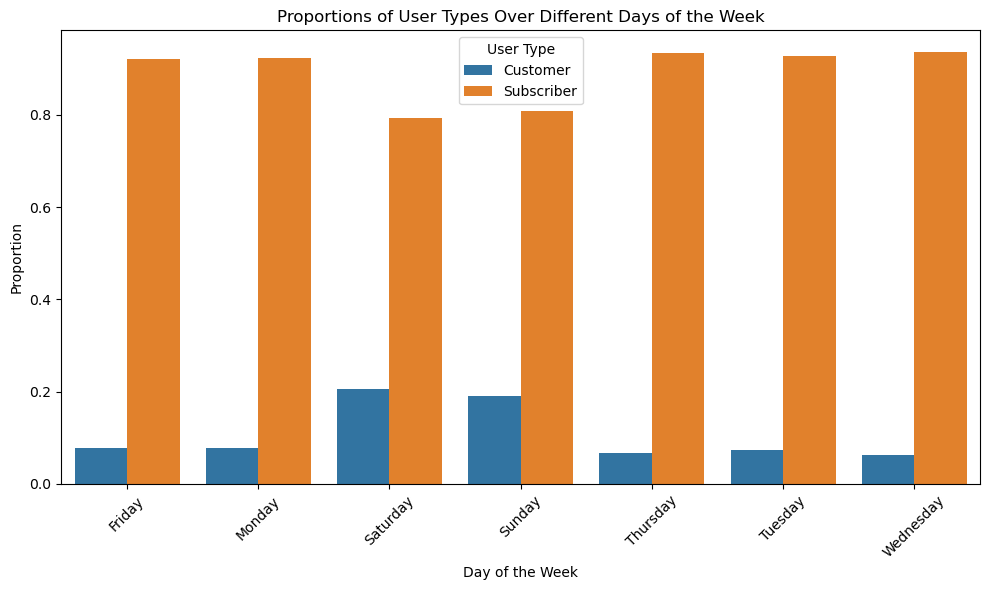

In [5]:
plt.figure(figsize=(10, 6))
sns.barplot(data=daily_user_type_proportions, x='start_day_of_week', y='tripduration', hue='user_type')
plt.title('Proportions of User Types Over Different Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='User Type')
plt.show()

In [6]:
starting_stations = cb_df[['start station id', 'start station name']]
station_trip_count = starting_stations.groupby('start station name')['start station id'].count()
top_starting_stations = station_trip_count.sort_values(ascending=False).head(10)

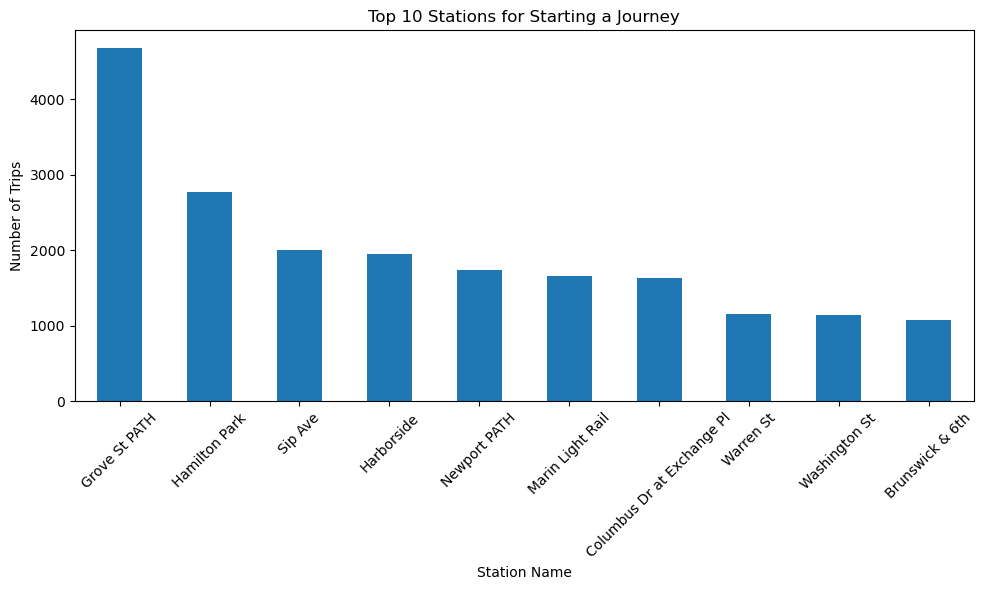

In [7]:
plt.figure(figsize=(10, 6))
top_starting_stations.plot(kind='bar')
plt.title('Top 10 Stations for Starting a Journey')
plt.xlabel('Station Name')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [8]:
def haversine_distance(lat1, lon1, lat2, lon2):
    R = 3959.87433  # Earth's radius in miles
    dlat = np.radians(lat2 - lat1)
    dlon = np.radians(lon2 - lon1)
    a = np.sin(dlat / 2) ** 2 + np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.sin(dlon / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = R * c
    return distance
cb_df['distance_miles'] = haversine_distance(cb_df['start station latitude'], cb_df['start station longitude'],
                                              cb_df['end station latitude'], cb_df['end station longitude'])
average_distance = cb_df['distance_miles'].mean()


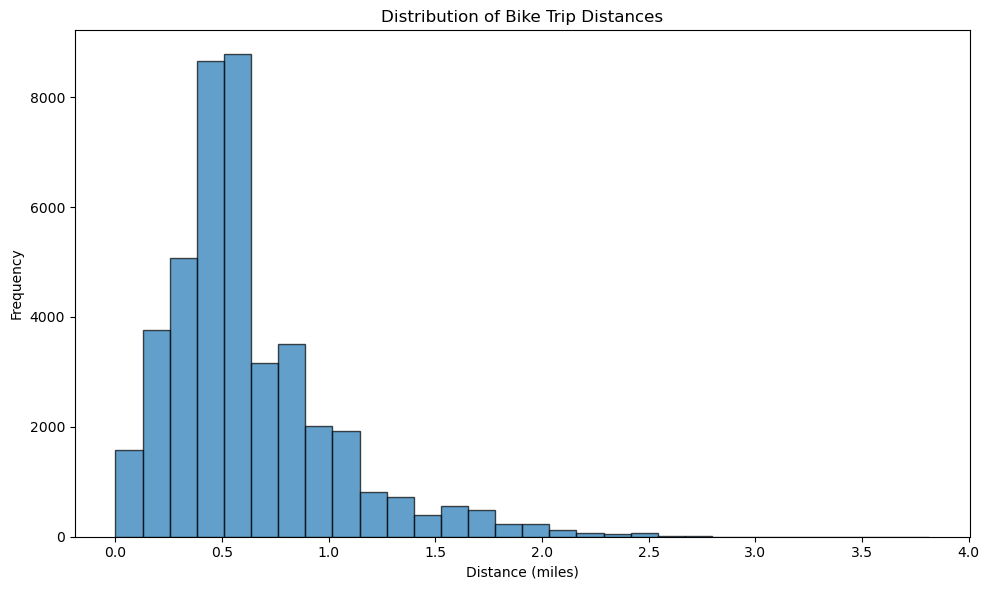

In [9]:
plt.figure(figsize=(10, 6))
plt.hist(cb_df['distance_miles'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of Bike Trip Distances')
plt.xlabel('Distance (miles)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [10]:
cb_df['starttime'] = pd.to_datetime(cb_df['starttime'])
cb_df['start_hour'] = cb_df['starttime'].dt.hour
hourly_trip_count = cb_df.groupby('start_hour')['tripduration'].count()

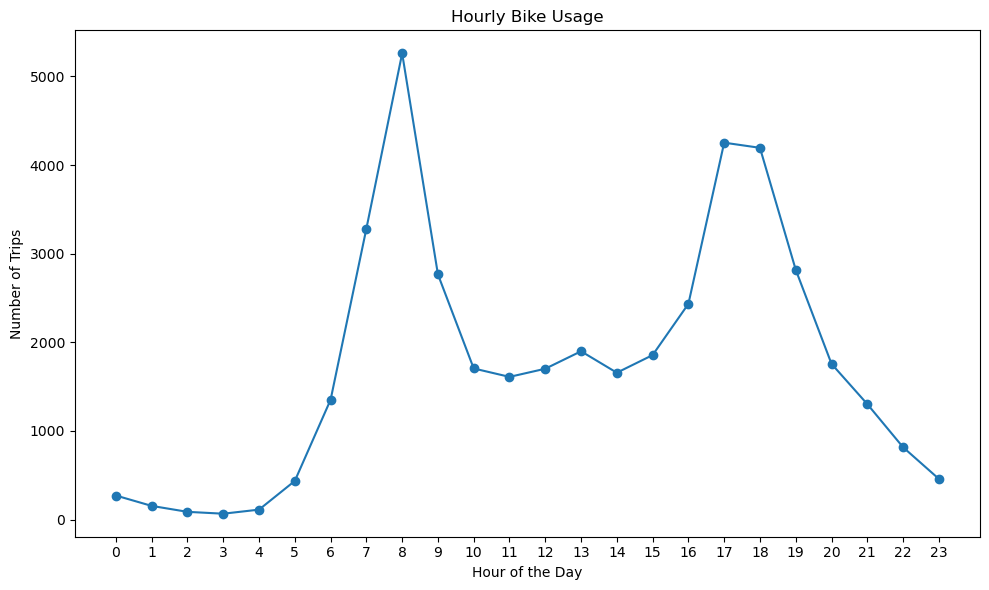

In [11]:
plt.figure(figsize=(10, 6))
hourly_trip_count.plot(kind='line', marker='o')
plt.title('Hourly Bike Usage')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.xticks(range(24))
plt.tight_layout()
plt.show()

In [12]:
cb_df.to_csv('JC-201910-citibike-tripdata.csv', index=False)
print("Changes overwritten to JC-201910-citibike-tripdata.csv")

Changes overwritten to JC-201910-citibike-tripdata.csv
